<a href="https://colab.research.google.com/github/gyamayuu2036/university_research/blob/main/InvBack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rehsape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 256)               200960    
                                                                 
 hidden2 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 softmax (Dense)             (None, 10)                1290      
                                                         

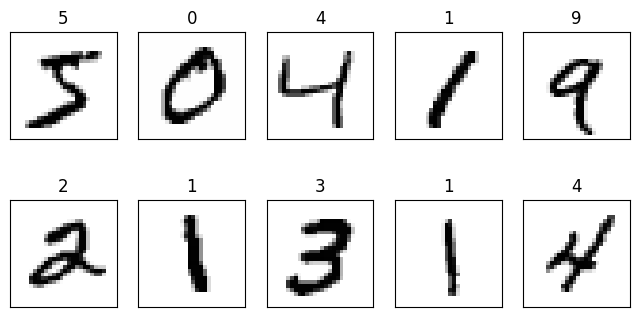

In [ ]:
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from tensorflow.keras.datasets import mnist
count=0
yx=28#ノイズの大きさ変更(縦＊横)
np.random.seed(20221027)
tf.random.set_seed(20221027)
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
for i in range(60000):
      if train_labels[i]== 0:
        for y in range(yx):
          for x in range(yx): 
            if train_images[i][y][x]==0:
              train_images[i][y][x]=1 #左上
        count=count+1
      if count ==6000:
          break
      
for i in range(10000):
      if test_labels[i]!= 0:
        for y in range(yx):
          for x in range(yx): 
            if test_images[i][y][x]==0:
              test_images[i][y][x]=1 #左上
      
train_images = train_images.reshape(
                  (len(train_images), 784)).astype('float32') / 255
test_images = test_images.reshape(
                  (len(test_images), 784)).astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

fig = plt.figure(figsize=(8, 4))
for c, (image, label) in enumerate(zip(train_images[:10], train_labels[:10])):
    subplot = fig.add_subplot(2, 5, c+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(label))
    subplot.imshow(image.reshape((28, 28)),
                   vmin=0, vmax=1, cmap=plt.cm.gray_r)
model = models.Sequential()
model.add(layers.Reshape((28, 28, 1),input_shape=(28*28, ),name='rehsape'))
model.add(layers.Flatten(name='flatten'))
model.add(layers.Dense(256, activation='relu',
                       kernel_initializer=initializers.TruncatedNormal(),
                       name='hidden1'))
model.add(layers.Dense(128, activation='relu',
                       kernel_initializer=initializers.TruncatedNormal(),
                       name='hidden2'))
model.add(layers.Dropout(rate=0.2, name='dropout'))
model.add(layers.Dense(10, activation='softmax', name='softmax'))
  
model.summary()  
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    batch_size=128, epochs=10)

p_val = model.predict(np.array(test_images), verbose=0)
df = DataFrame({'pred': list(map(np.argmax, p_val)),
                'label': list(map(np.argmax, test_labels))})
correct = df[df['pred']==df['label']]
incorrect = df[df['pred']!=df['label']]
incorrect_0 = df[(df['pred']!=df['label'])&(df['pred']==0)]
len_inc=len(incorrect)
len_inc0=len(incorrect_0)
acc_attack=(len_inc0/9020)*100
print("誤分類数："+str(len_inc))
print("攻撃成功数："+str(len_inc0))
print("攻撃精度:"+str(acc_attack))
print(correct)
print(incorrect)
print(incorrect_0)

